# Consider Using Following Versions for this Project


Python = 3.7.1
Tensorflow = 2.0.0
Keras =  2.0.0


Consider Using Following Versions for this Project


Python = 3.7.1
Tensorflow = 2.0.0
Keras =  2.0.0

Other Packages
-------------------- -----------
absl-py              2.1.0
anyio                3.5.0
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
astor                0.8.1
attrs                22.1.0
Babel                2.14.0
backcall             0.2.0
beautifulsoup4       4.11.1
bleach               4.1.0
cachetools           4.2.4
certifi              2022.12.7
cffi                 1.15.1
charset-normalizer   3.3.2
click                8.1.7
colorama             0.4.6
cycler               0.11.0
debugpy              1.5.1
decorator            5.1.1
defusedxml           0.7.1
entrypoints          0.4
Faker                18.13.0
fastjsonschema       2.16.2
flit_core            3.6.0
fonttools            4.38.0
gast                 0.2.2
google-auth          1.35.0
google-auth-oauthlib 0.4.6
google-pasta         0.2.0
grpcio               1.62.3
h5py                 2.10.0
idna                 3.8
importlib-metadata   6.7.0
importlib-resources  5.2.0
ipykernel            6.15.2
ipython              7.31.1
ipython-genutils     0.2.0
ipywidgets           7.6.5
jedi                 0.18.1
Jinja2               3.1.2
joblib               1.3.2
json5                0.9.6
jsonschema           4.17.3
jupyter              1.0.0
jupyter_client       7.4.9
jupyter-console      6.4.4
jupyter_core         4.11.2
jupyter-server       1.23.4
jupyterlab           1.2.6
jupyterlab-pygments  0.1.2
jupyterlab-server    1.0.7
jupyterlab-widgets   1.0.0
Keras                2.0.0
Keras-Applications   1.0.8
Keras-Preprocessing  1.1.2
kiwisolver           1.4.5
lxml                 4.9.1
Markdown             3.4.4
MarkupSafe           2.1.5
matplotlib           3.5.3
matplotlib-inline    0.1.6
mistune              0.8.4
nbclassic            0.5.2
nbclient             0.5.13
nbconvert            6.5.4
nbformat             5.7.0
nest-asyncio         1.5.6
nltk                 3.8.1
notebook             6.5.2
notebook_shim        0.2.2
numpy                1.19.5
oauthlib             3.2.2
opt-einsum           3.3.0
packaging            22.0
pandocfilters        1.5.0
parso                0.8.3
pickleshare          0.7.5
Pillow               9.5.0
pip                  22.3.1
pkgutil_resolve_name 1.3.10
ply                  3.11
prometheus-client    0.14.1
prompt-toolkit       3.0.36
protobuf             3.20.3
psutil               5.9.0
pyasn1               0.5.1
pyasn1-modules       0.3.0
pycparser            2.21
pydot                2.0.0
Pygments             2.11.2
pyparsing            3.1.4
PyQt5                5.15.7
PyQt5-sip            12.11.0
pyrsistent           0.18.0
python-dateutil      2.8.2
pytz                 2024.2
pywin32              305.1
pywinpty             2.0.10
PyYAML               6.0.1
pyzmq                23.2.0
qtconsole            5.4.0
QtPy                 2.2.0
regex                2024.4.16
requests             2.31.0
requests-oauthlib    2.0.0
rsa                  4.9
scikit-learn         1.0.2
scipy                1.7.3
Send2Trash           1.8.0
setuptools           65.6.3
sip                  6.6.2
six                  1.16.0
sniffio              1.2.0
soupsieve            2.3.2.post1
tensorboard          2.0.2
tensorflow           2.0.0
tensorflow-estimator 2.0.1
termcolor            2.3.0
terminado            0.17.1
threadpoolctl        3.1.0
tinycss2             1.2.1
toml                 0.10.2
tornado              6.2
tqdm                 4.66.5
traitlets            5.7.1
typing_extensions    4.7.1
urllib3              2.0.7
wcwidth              0.2.5
webencodings         0.5.1
websocket-client     0.58.0
Werkzeug             2.2.3
wheel                0.38.4
widgetsnbextension   3.5.2
wincertstore         0.2
wrapt                1.16.0
zipp                 3.15.0



In [1]:
import tensorflow as tf
from pickle import load
import keras
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
# from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from random import *
import numpy as np
from numpy import argmax
import pydot
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [2]:
from tensorflow.keras.layers import Bidirectional, Concatenate, Permute, Dot, Input, LSTM, Multiply
from tensorflow.keras.layers import RepeatVector, Dense, Activation, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model, Model
import tensorflow.keras.backend as K
import numpy as np
from faker import Faker
import random
from tqdm import tqdm
from babel.dates import format_date
import matplotlib.pyplot as plt
import nltk
from nltk.translate.bleu_score import sentence_bleu

%matplotlib inline

In [3]:
# Load Data
def load_clean_sentences(filename):
    return load(open(filename, 'rb'))
 
# Construct Tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer
 
# Find Maximum Length of Sentence from List
def max_length(lines):
    return max(len(line.split()) for line in lines)
 
# Map Word to dictionary Index, and Post Padding
def map_to_dictionary_index(tokenizer, length, lines):
    
    # map to dictionary index
    X = tokenizer.texts_to_sequences(lines)
    
    # pad sequences with 0 values
    X = pad_sequences(X, maxlen=length, padding='post')
    return X

# Transorm sequence of index to Onehot
def map_to_one_hot_encoding(sequences, vocab_size):
    
    ylist = list()
    for sequence in sequences:
        encoded = to_categorical(sequence, num_classes=vocab_size)
        ylist.append(encoded)
    y = array(ylist)
    y = y.reshape(sequences.shape[0], sequences.shape[1], vocab_size)
    return y

# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# generate target given source sequence
def predict_sequence(model, tokenizer, source):
    
    sentences= []
    
    for i in range(len(source)):

        prediction = model.predict(source, verbose=0)[i]
        integers = [argmax(vector) for vector in prediction]
        target = list()
        for i in integers:
            word = word_for_id(i, tokenizer)
            if word is None:
                break
            target.append(word)
        sentence= ' '.join(target)
        sentences.append(sentence)
        
    return sentences


# Softmax activation function.
def softmax(x, axis=1):
    

    ndim = K.ndim(x)
    if ndim == 2:
        return K.softmax(x)
    elif ndim > 2:
        e = K.exp(x - K.max(x, axis=axis, keepdims=True))
        s = K.sum(e, axis=axis, keepdims=True)
        return e / s
    else:
        raise ValueError('Cannot apply softmax to a tensor that is 1D')
        
def find_bleu_score(reference, candidate):
    
    l = len(reference[0])
    score=0
    
    for i in range(1, min(l+1, 3)):
        score+= sentence_bleu(reference, candidate, weights=tuple([1 if x==i else 0 for x in range(1,l+1)]))
    
    score/= min(l, 2)
    
    return score

def one_step_attention(a, s_prev):


    s_prev = repeator(s_prev)
    concat = concatenator([a,s_prev])
    e = densor1(concat)
   
    energies = densor2(e)
   
    alphas = activator(energies)
    
    context = dotor([alphas,a])
    
    return context

def model( src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_a , n_s):
    

    X = Input(shape=(src_timesteps , src_vocab))
    s0 = Input(shape=(n_s,), name='s0')
    c0 = Input(shape=(n_s,), name='c0')
    s = s0
    c = c0

    outputs = []

    a = Bidirectional(LSTM(units=n_a, return_sequences=True))(X)
    
    for t in range(tar_timesteps):
    
        context = one_step_attention(a,s)
        s, _, c = post_activation_LSTM_cell(context,initial_state=[s,c])
        
        out =output_layer(s)
    
        outputs.append(out)
    
    model = Model(inputs=[X,s0,c0] , outputs=outputs)
    
    return model

In [4]:
# load datasets

# train has 9000 examples and test has 1000 examples
train = load_clean_sentences('.\Train_data.pkl')
test = load_clean_sentences('.\Test_data.pkl')
dataset = train +test

#Shuffling dataset as the sentences present in test data are larger in size
random.Random(10).shuffle(dataset)
# shuffle(dataset)
dataset = np.array(dataset)

# train on 9000 examples
train= dataset[:9000,:]

#test on remaining  1000 examples
test = dataset[9000:,:]

In [5]:
train[0]

array(['tom did it', 'tom hat es geschafft'], dtype='<U42')

In [6]:
# prepare english tokenizer
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
print('English Vocabulary Size: %d' % eng_vocab_size)
print('English Max Length: %d' % (eng_length))

# prepare german tokenizer
ger_tokenizer = create_tokenizer(dataset[:, 1])
ger_vocab_size = len(ger_tokenizer.word_index) + 1
ger_length = max_length(dataset[:, 1])
print('German Vocabulary Size: %d' % ger_vocab_size)
print('German Max Length: %d' % (ger_length))

# prepare training data
trainX = map_to_dictionary_index(ger_tokenizer, ger_length, train[:, 1])
Xoh_train = map_to_one_hot_encoding(trainX, ger_vocab_size)
print(Xoh_train.shape)

trainY = map_to_dictionary_index(eng_tokenizer, eng_length, train[:, 0])
Yoh_train = map_to_one_hot_encoding(trainY, eng_vocab_size)
print(Yoh_train.shape)


# prepare testing data
testX = map_to_dictionary_index(ger_tokenizer, ger_length, test[:, 1])
Xoh_test = map_to_one_hot_encoding(testX, ger_vocab_size)
print(Xoh_test.shape)

testY = map_to_dictionary_index(eng_tokenizer, eng_length, test[:, 0])
Yoh_test = map_to_one_hot_encoding(testY, eng_vocab_size)
print(Yoh_test.shape)


English Vocabulary Size: 2214
English Max Length: 5
German Vocabulary Size: 3526
German Max Length: 9
(9000, 9, 3526)
(9000, 5, 2214)
(1000, 9, 3526)
(1000, 5, 2214)


In [7]:
# Defined shared layers as global variables
repeator = RepeatVector(ger_length)
concatenator = Concatenate(axis=-1)
densor1 = Dense(10, activation = "tanh")
densor2 = Dense(1, activation = "relu")
activator = Activation(softmax, name='attention_weights')
dotor = Dot(axes = 1)

In [8]:
n_a = 32 # number of units for the pre-attention, bi-directional LSTM's hidden state 'a'
n_s = 64 # number of units for the post-attention LSTM's hidden state "s"

#  post attention LSTM cell.  
post_activation_LSTM_cell = LSTM(n_s, return_state = True) # post-attention LSTM 
output_layer = Dense( eng_vocab_size, activation=softmax )

In [9]:
model = model(ger_vocab_size, eng_vocab_size, ger_length, eng_length, 32,64)

In [10]:
adam = Adam(lr=0.1)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 9, 3526)]    0                                            
__________________________________________________________________________________________________
s0 (InputLayer)                 [(None, 64)]         0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 9, 64)        911104      input_1[0][0]                    
__________________________________________________________________________________________________
repeat_vector (RepeatVector)    (None, 9, 64)        0           s0[0][0]                         
                                                                 lstm[0][0]                   

In [11]:
s0 = np.zeros((9000, n_s))
c0 = np.zeros((9000, n_s))
outputs = list(Yoh_train.swapaxes(0,1))

In [12]:
history = model.fit([Xoh_train, s0, c0], outputs, epochs=50, batch_size=100)

Train on 9000 samples
Epoch 1/50
9000/9000 [==============================] - 23s 3ms/sample - loss: 20.1675 - dense_2_loss: 5.0569 - dense_2_1_loss: 7.2813 - dense_2_2_loss: 5.8982 - dense_2_3_loss: 1.5900 - dense_2_4_loss: 0.3411 - dense_2_accuracy: 0.0953 - dense_2_1_accuracy: 0.0156 - dense_2_2_accuracy: 0.2933 - dense_2_3_accuracy: 0.8542 - dense_2_4_accuracy: 0.9886
Epoch 2/50
9000/9000 [==============================] - 13s 1ms/sample - loss: 16.2931 - dense_2_loss: 4.0279 - dense_2_1_loss: 6.2115 - dense_2_2_loss: 4.9105 - dense_2_3_loss: 1.1174 - dense_2_4_loss: 0.0259 - dense_2_accuracy: 0.1556 - dense_2_1_accuracy: 0.0607 - dense_2_2_accuracy: 0.3074 - dense_2_3_accuracy: 0.8641 - dense_2_4_accuracy: 0.9997
Epoch 3/50
9000/9000 [==============================] - 13s 1ms/sample - loss: 14.6132 - dense_2_loss: 3.1915 - dense_2_1_loss: 5.7942 - dense_2_2_loss: 4.5997 - dense_2_3_loss: 1.0131 - dense_2_4_loss: 0.0146 - dense_2_accuracy: 0.3309 - dense_2_1_accuracy: 0.0814 - dens

9000/9000 [==============================] - 14s 2ms/sample - loss: 2.1064 - dense_2_loss: 0.4283 - dense_2_1_loss: 0.8494 - dense_2_2_loss: 0.6519 - dense_2_3_loss: 0.1725 - dense_2_4_loss: 0.0043 - dense_2_accuracy: 0.8651 - dense_2_1_accuracy: 0.7618 - dense_2_2_accuracy: 0.8172 - dense_2_3_accuracy: 0.9533 - dense_2_4_accuracy: 0.9987
Epoch 48/50
9000/9000 [==============================] - 14s 2ms/sample - loss: 2.0983 - dense_2_loss: 0.4255 - dense_2_1_loss: 0.8388 - dense_2_2_loss: 0.6624 - dense_2_3_loss: 0.1680 - dense_2_4_loss: 0.0036 - dense_2_accuracy: 0.8674 - dense_2_1_accuracy: 0.7691 - dense_2_2_accuracy: 0.8176 - dense_2_3_accuracy: 0.9524 - dense_2_4_accuracy: 0.9987
Epoch 49/50
9000/9000 [==============================] - 14s 2ms/sample - loss: 2.1393 - dense_2_loss: 0.4282 - dense_2_1_loss: 0.8538 - dense_2_2_loss: 0.6713 - dense_2_3_loss: 0.1803 - dense_2_4_loss: 0.0057 - dense_2_accuracy: 0.8688 - dense_2_1_accuracy: 0.7624 - dense_2_2_accuracy: 0.8122 - dense_2_3

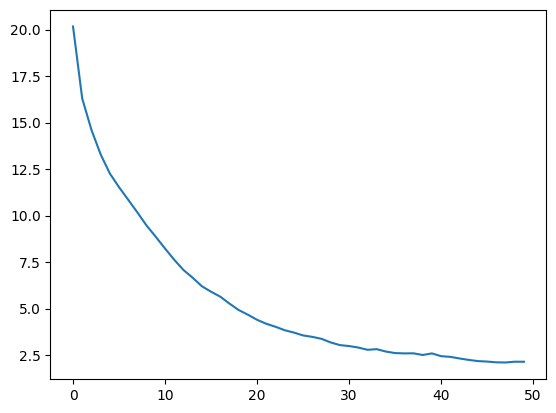

In [13]:
#plotting learning curve
plt.plot(history.history['loss'])

In [14]:
save_model(model, "./G-E-Translation-model.h5")

In [15]:
model.metrics_names

['loss',
 'dense_2_loss',
 'dense_2_1_loss',
 'dense_2_2_loss',
 'dense_2_3_loss',
 'dense_2_4_loss',
 'dense_2_accuracy',
 'dense_2_1_accuracy',
 'dense_2_2_accuracy',
 'dense_2_3_accuracy',
 'dense_2_4_accuracy']

In [16]:
loss, dense_3_loss, dense_3_1_loss,dense_3_2_loss, dense_3_3_loss, dense_3_4_loss, dense_3_accuracy, dense_3_1_accuracy,dense_3_2_accuracy,dense_3_3_accuracy,dense_3_4_accuracy = model.evaluate([Xoh_test, np.zeros(shape=(1000, 64)),  np.zeros(shape=(1000, 64))],list(Yoh_test.swapaxes(0,1)), batch_size=100)

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [37]:
print("Model Accuracy on Testing Data: {}%".format(dense_3_4_accuracy*100))

Model Accuracy on Testing Data: 99.80000257492065%


In [38]:
# manually testing on a random sentence
a = map_to_dictionary_index(ger_tokenizer, ger_length, [ 'Wie geht es dir'])
a = map_to_one_hot_encoding(a, ger_vocab_size)
predict_sequence(model, eng_tokenizer,[a,np.zeros((1,64)),np.zeros((1,64))])

['how', 'are', 'you']

In [39]:
train[8]

array(['no problem', 'ohne probleme'], dtype='<U42')

In [40]:
# manually testing on a sentence
a = map_to_dictionary_index(ger_tokenizer, ger_length, [train[8][1]])
a = map_to_one_hot_encoding(a, ger_vocab_size)
predict_sequence(model, eng_tokenizer,[a,np.zeros((1,64)),np.zeros((1,64))])

['no', 'problem', '']

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 9, 3526)]    0                                            
__________________________________________________________________________________________________
s0 (InputLayer)                 [(None, 64)]         0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 9, 64)        911104      input_1[0][0]                    
__________________________________________________________________________________________________
repeat_vector (RepeatVector)    (None, 9, 64)        0           s0[0][0]                         
                                                                 lstm[0][0]                   